In [36]:
import networkx as nx
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import glob
import string
#this will allow the plot to be inline in the browser
%matplotlib inline

## The data is a Multigraph, we need this function to avoid multiple edges

In [37]:
def fromMulti_to_Single(G):
    H = nx.Graph()
    for u,v,d in G.edges(data=True):
        H.add_edge(u,v)
    return H

## This part reads all the files and save propoerties (num nodes, path length and clustering coefficient)

In [38]:
g = nx.Graph()
fnames=[]
node_num=[]
path1='/Users/marta/CYPLAN290/Assignment1/SubwayData/*.net';
for fn in glob.iglob(path1):
    fnames.append(fn)
    #print fname[0]
    g=nx.read_pajek(fn)
    G = max(nx.connected_component_subgraphs(g), key=len)
    node_num.append(G.number_of_nodes())

In [39]:
node_num

[128, 104, 170, 141, 82, 266, 209, 147, 134, 433, 108, 299, 392, 148, 217]

In [40]:
I=np.argsort(node_num)

In [50]:
I

array([ 4,  1, 10,  0,  8,  3,  7, 13,  2,  6, 14,  5, 11, 12,  9])

## Read in Sorted order and Calculate avg C and avg Shortest Path Length 

In [203]:
pathlength=[]
clustering=[]
k = []
node_num=[]
names=[]
fnames_sorted=[]
path2='/Users/marta/CYPLAN290/Assignment1/SubwayData/'

for i in I:
    #print fnames[i]
    g=nx.read_pajek(fnames[i])
    fn=fnames[i]
    fname = str.split(fn[len(path2):],'.')  ### Modify accordingly or comment this and next line
    names.append(fname[0])
    fnames_sorted.append(fnames[i])
    G = max(nx.connected_component_subgraphs(g), key=len)
    node_num.append(G.number_of_nodes())
    H=fromMulti_to_Single(G)
    clustering.append(nx.average_clustering(H))
    pathlength.append(nx.average_shortest_path_length(H))
    k.append(np.mean(dict(nx.degree(H)).values()))

In [65]:
node_num

[82, 104, 108, 128, 134, 141, 147, 148, 170, 209, 217, 266, 299, 392, 433]

In [66]:
names

['HongKong',
 'Beijing',
 'Osaka',
 'Barcelona',
 'Moscow',
 'Chicago',
 'Mexico',
 'Shanghai',
 'Berlin',
 'Madrid',
 'Tokyo',
 'London',
 'Paris',
 'Seoul',
 'NewYork']

In [68]:
k

[2.0731707317073171,
 2.1923076923076925,
 2.2777777777777777,
 2.234375,
 2.3283582089552239,
 2.1134751773049647,
 2.2312925170068025,
 2.1351351351351351,
 2.1411764705882352,
 2.2966507177033493,
 2.414746543778802,
 2.3157894736842106,
 2.3812709030100336,
 2.2295918367346941,
 2.1939953810623556]

## Plot shortest path length 

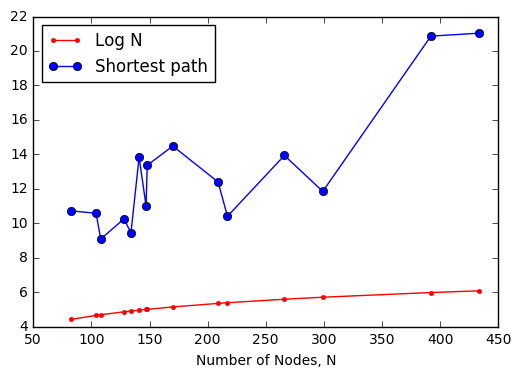

In [12]:
plt.plot(node_num,np.log(node_num),'-r.',label='Log N')
plt.plot(node_num,pathlength,'-bo',label='Shortest path')
plt.legend(loc="upper left")
plt.xlabel("Number of Nodes, N")
plt.show()

## Plot Clustering Coefficient

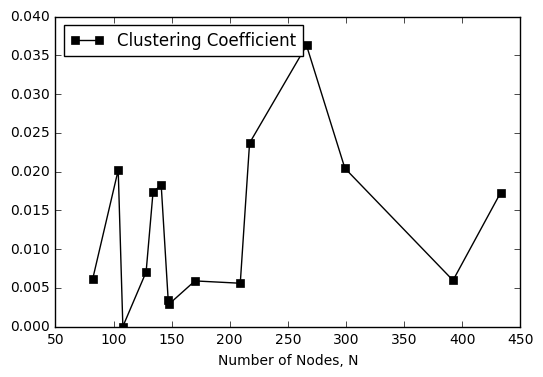

In [13]:
plt.plot(node_num,clustering,'-ks',label='Clustering Coefficient')
plt.legend(loc="upper left")
plt.xlabel("Number of Nodes, N")
plt.show()

## Exercise compare to the Random Graph with same number of Nodes and average degree

For this part we only modify Step 3  and 4of the script RG+exercise+solution

In [241]:
clusteringRG = []
for i in range(0,len(node_num)):
    print names[i]," ",k[i]," ",node_num[i]
    rg= nx.fast_gnp_random_graph(node_num[i],k[i]/node_num[i])
    RG=max(nx.connected_component_subgraphs(rg), key=len)
    clusteringRG.append(nx.average_clustering(RG))

HongKong   2.07317073171   82
Beijing   2.19230769231   104
Osaka   2.27777777778   108
Barcelona   2.234375   128
Moscow   2.32835820896   134
Chicago   2.1134751773   141
Mexico   2.23129251701   147
Shanghai   2.13513513514   148
Berlin   2.14117647059   170
Madrid   2.2966507177   209
Tokyo   2.41474654378   217
London   2.31578947368   266
Paris   2.38127090301   299
Seoul   2.22959183673   392
NewYork   2.19399538106   433


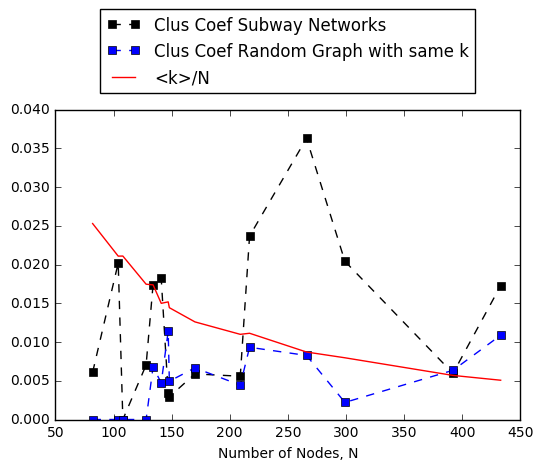

In [242]:
plt.plot(node_num,clustering,'--ks',label='Clus Coef Subway Networks')
plt.plot(node_num,clusteringRG,'--bs',label='Clus Coef Random Graph with same k')
plt.plot(node_num,np.squeeze(k) / np.squeeze(node_num),'-r',label='<k>/N')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.35))
plt.xlabel("Number of Nodes, N")
plt.show()

In [111]:
pathRG = []
for i in range(0,len(node_num)):
    print names[i]," ",k[i]," ",node_num[i]
    rg= nx.fast_gnp_random_graph(node_num[i],k[i]/node_num[i])
    RG=max(nx.connected_component_subgraphs(rg), key=len)
    pathRG.append(nx.average_shortest_path_length(RG))

HongKong   2.07317073171   82
Beijing   2.19230769231   104
Osaka   2.27777777778   108
Barcelona   2.234375   128
Moscow   2.32835820896   134
Chicago   2.1134751773   141
Mexico   2.23129251701   147
Shanghai   2.13513513514   148
Berlin   2.14117647059   170
Madrid   2.2966507177   209
Tokyo   2.41474654378   217
London   2.31578947368   266
Paris   2.38127090301   299
Seoul   2.22959183673   392
NewYork   2.19399538106   433


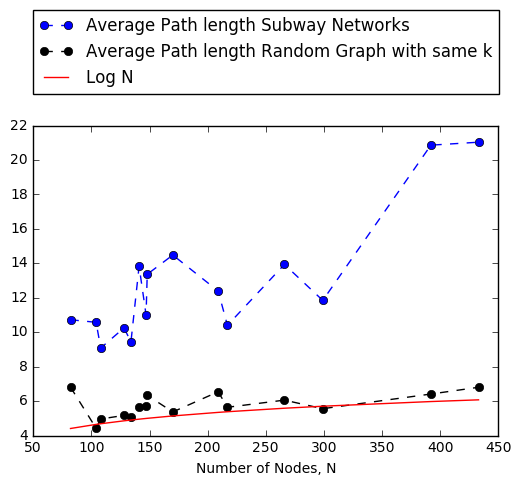

In [117]:
plt.plot(node_num,pathlength,'--bo',label='Average Path length Subway Networks')
plt.plot(node_num,pathRG,'--ko',label='Average Path length Random Graph with same k')
plt.plot(node_num,np.log(node_num),'-r',label='Log N')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.4))
plt.xlabel("Number of Nodes, N")
plt.show()

## Exercise compare to the SW Graph with same number of Nodes, average degree and Clustering Coefficient

In [225]:
psw=1.0
clusteringSW = []
for i in range(0,len(node_num)):
    print names[i]," ",2," ",node_num[i]
    sw=nx.watts_strogatz_graph(node_num[i],int(math.floor(k[i])),psw)
    SW=max(nx.connected_component_subgraphs(sw), key=len)
    clusteringSW.append(nx.average_clustering(SW))

HongKong   2   82
Beijing   2   104
Osaka   2   108
Barcelona   2   128
Moscow   2   134
Chicago   2   141
Mexico   2   147
Shanghai   2   148
Berlin   2   170
Madrid   2   209
Tokyo   2   217
London   2   266
Paris   2   299
Seoul   2   392
NewYork   2   433


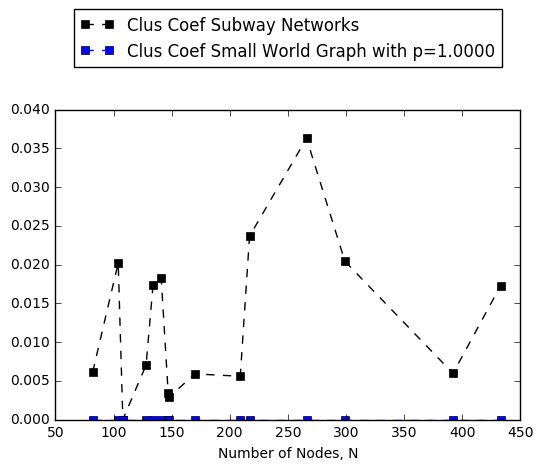

In [275]:
plt.plot(node_num,clustering,'--ks',label='Clus Coef Subway Networks')
plt.plot(node_num,clusteringSW,'--bs',label='Clus Coef Small World Graph with p=%.4f'%(psw))
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.35))
plt.xlabel("Number of Nodes, N")
plt.show()

In [234]:
pathSW = []
for i in range(0,len(node_num)):
    print names[i]," ",2," ",node_num[i]
    sw=nx.watts_strogatz_graph(node_num[i],int(math.floor(k[i])),psw)
    SW=max(nx.connected_component_subgraphs(sw), key=len)
    pathSW.append(nx.average_shortest_path_length(SW))

HongKong   2   82
Beijing   2   104
Osaka   2   108
Barcelona   2   128
Moscow   2   134
Chicago   2   141
Mexico   2   147
Shanghai   2   148
Berlin   2   170
Madrid   2   209
Tokyo   2   217
London   2   266
Paris   2   299
Seoul   2   392
NewYork   2   433


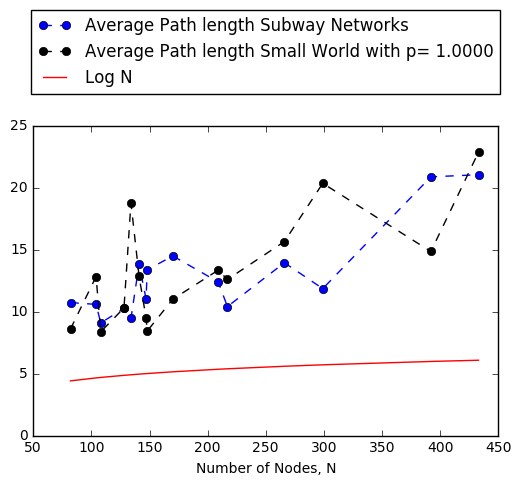

In [228]:
plt.plot(node_num,pathlength,'--bo',label='Average Path length Subway Networks')
plt.plot(node_num,pathSW,'--ko',label='Average Path length Small World with p= %.4f'%(psw))
plt.plot(node_num,np.log(node_num),'-r',label='Log N')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.4))
plt.xlabel("Number of Nodes, N")
plt.show()

In [291]:
sw=nx.watts_strogatz_graph(node_num[3],int(math.floor(k[3])),psw)
SW=max(nx.connected_component_subgraphs(sw), key=len)
rg= nx.fast_gnp_random_graph(node_num[3],k[3]/node_num[3])
RG=max(nx.connected_component_subgraphs(rg), key=len)
g=nx.read_pajek(fnames[3])
G=max(nx.connected_component_subgraphs(g), key=len)

(-1.1725093786314305,
 0.81545584178791186,
 -1.01348409997599,
 0.89451678798426626)

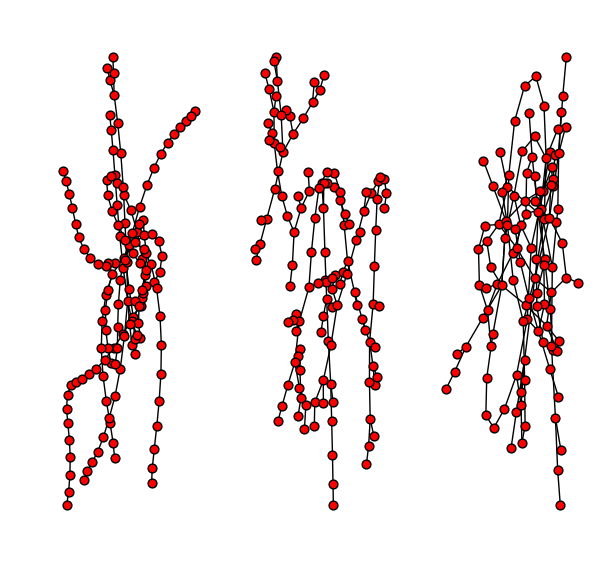

In [292]:
fig = plt.figure(figsize=(7,7))
plt.subplot(1,3,1)
nx.draw(G,node_size =40); plt.axis('tight')
plt.subplot(1,3,2)
nx.draw(sw ,node_size =40); plt.axis('tight')
plt.subplot(1,3,3)
nx.draw(RG,node_size =40); plt.axis('tight')

In [248]:
fnames_sorted[3]

'/Users/marta/CYPLAN290/Assignment1/SubwayData/Barcelona.net'

In [259]:
print names[3],"N=",node_num[3],"k=",k[3],"CC=",clustering[3],"<l>=",pathlength[3]

Barcelona N= 128 k= 2.234375 CC= 0.00703125 <l>= 10.2466781496


In [270]:
print "N_{RG}=",nx.number_of_nodes(RG),"k=",np.mean(dict(nx.degree(RG)).values()),"CC=",nx.average_clustering(RG),"<l>=",nx.average_shortest_path_length(RG)

N_{RG}= 106 k= 2.45283018868 CC= 0.0135220125786 <l>= 5.79101527403


In [273]:
print "N_{SW}=",nx.number_of_nodes(SW),"k=",np.mean(dict(nx.degree(SW)).values()),"CC=",nx.average_clustering(SW),"<l>=",nx.average_shortest_path_length(SW)

N_{SW}= 73 k= 2.0 CC= 0.0 <l>= 8.0696347032


## SW p=0.5 with K=4

In [313]:
sw=nx.watts_strogatz_graph(node_num[3],4,0.5)
SW=max(nx.connected_component_subgraphs(sw), key=len)

In [314]:
print "N_{SW}=",nx.number_of_nodes(SW),"k=",np.mean(dict(nx.degree(SW)).values()),"CC=",nx.average_clustering(SW),"<l>=",nx.average_shortest_path_length(SW)

N_{SW}= 128 k= 4.0 CC= 0.104836309524 <l>= 3.75258366142


(-0.79355495583491797,
 0.75342542702430026,
 -0.96266725335816994,
 1.1864977933055276)

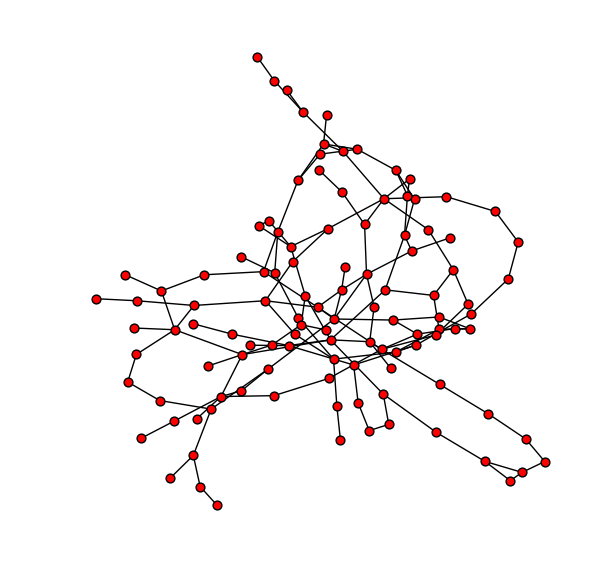

In [315]:
fig = plt.figure(figsize=(7,7))
plt.subplot(1,1,1)
nx.draw(RG,node_size =40); plt.axis('tight')